# PROBLEM STATEMENT

Detecting sarcasm in news headlines and articles is crucial for several reasons. Sarcasm occurs when someone says something but means the opposite, often with a humorous or critical tone. This can easily confuse readers, especially when vocal cues and body language are absent in written text. If sarcasm is not recognized, it can lead to misunderstandings and the spread of false 
information. For instance, a sarcastic headline about a political figure might make readers believe something that isn’t true, influencing public perception and opinion. This issue becomes even more significant when we consider automated systems like news aggregation platforms and social media algorithms. These systems rely on natural language processing (NLP) to curate and 
recommend content. If these systems fail to detect sarcasm, they might spread misleading or out of-context information, exacerbating the spread of false news. Furthermore, not all readers may recognize sarcasm, leading to varying interpretations of the same content. This can polarize audiences based on their understanding or misunderstanding of the sarcasm. Effective sarcasm detection is also essential for accurate sentiment analysis, which is used to assess public opinion and moderate content online. If sarcasm is not detected, sentiment analysis can be flawed, leading to incorrect insights and ineffective content moderation. 


# SOLUTION DESCRIPTION

# DATASET DESCRIPTION

# DATA VISUALIZATION

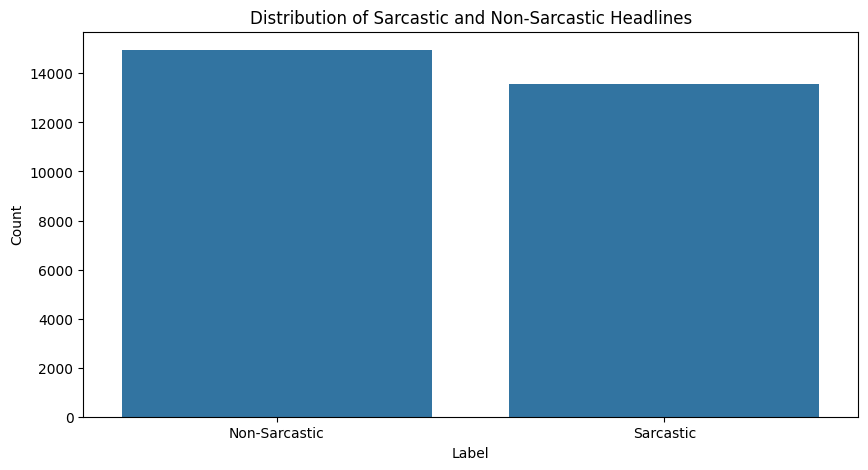

In [21]:
# Data Visualization for Label Distribution

# Count the number of sarcastic and non-sarcastic headlines
label_counts = data['is_sarcastic'].value_counts()
labels = ['Non-Sarcastic', 'Sarcastic']

# Plot Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=label_counts)
plt.title('Distribution of Sarcastic and Non-Sarcastic Headlines')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [15]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data['news_headline'], data['is_sarcastic'], test_size=0.20, random_state=42
)

# Label encoding the target variable
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Display the first few rows of training data and labels
print(train_data.head())
print(train_labels_encoded[:5])

2827     new law requires welfare recipients submit swe...
24271    jake tappers grim reminder steve bannon isnt p...
20969             journalists refuse take nonanswer answer
5678                    report shit last night trash night
5267                           importance first responders
Name: news_headline, dtype: object
[1 0 0 1 0]


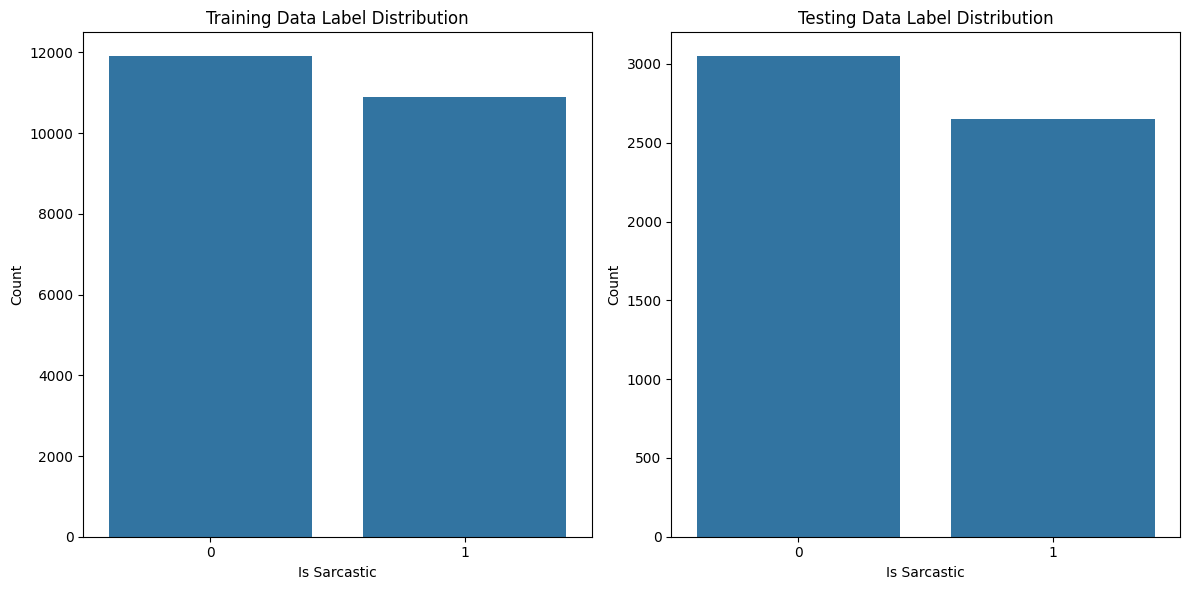

<Figure size 1200x600 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visualize the distribution of class labels in the training and testing sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=train_labels)
plt.title('Training Data Label Distribution')
plt.xlabel('Is Sarcastic')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=test_labels)
plt.title('Testing Data Label Distribution')
plt.xlabel('Is Sarcastic')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Function to generate and display a word cloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=42
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


# Distribution of headline lengths in training and testing sets
train_lengths = train_data.apply(lambda x: len(x.split()))
test_lengths = test_data.apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))

plt.tight_layout()
plt.show()

# CONFUSION MATRIX AND CLASSIFICATION REPORT

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels_encoded, cnn_lstm_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(test_labels_encoded, cnn_lstm_predictions))

Confusion Matrix:
[[2506  542]
 [ 533 2120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3048
           1       0.80      0.80      0.80      2653

    accuracy                           0.81      5701
   macro avg       0.81      0.81      0.81      5701
weighted avg       0.81      0.81      0.81      5701



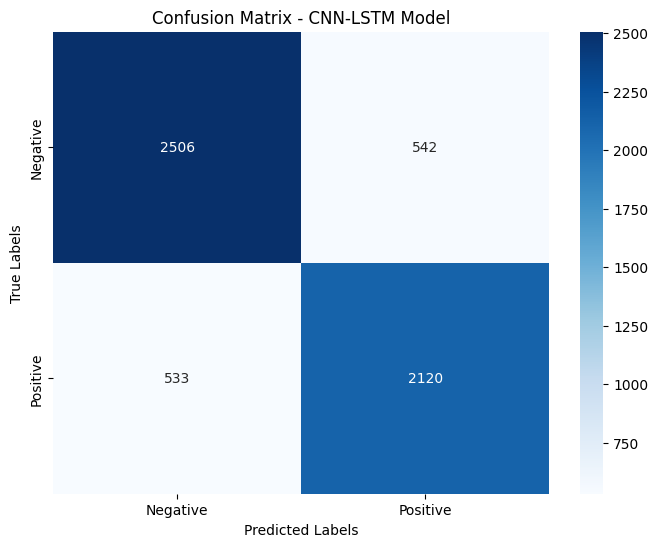

In [ ]:
# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CNN-LSTM Model')
plt.show()

# MAKING PREDICTIONS ON NEW DATA

In [ ]:
# Function to preprocess, tokenize, and pad a new sentence
def preprocess_and_predict(sentence, tokenizer, model, max_length):
    def preprocess_text(text):
        # Denoise text using the same preprocessing steps
        stop = set(stopwords.words('english'))
        punctuation = list(string.punctuation)
        stop.update(punctuation)

        def split_into_words(text):
            return text.split()

        def to_lower_case(words):
            return [word.lower() for word in words]

        def remove_punctuation(words):
            re_punc = re.compile('[%s]' % re.escape(string.punctuation))
            return [re_punc.sub('', w) for w in words]

        def keep_alphabetic(words):
            return [word for word in words if word.isalpha()]

        def remove_stopwords(words):
            return [w for w in words if not w in stop]

        def to_sentence(words):
            return ' '.join(words)

        words = split_into_words(text)
        words = to_lower_case(words)
        words = remove_punctuation(words)
        words = keep_alphabetic(words)
        words = remove_stopwords(words)
        return to_sentence(words)

    # Preprocess the input sentence
    processed_sentence = preprocess_text(sentence)

    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([processed_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Make prediction
    prediction = model.predict(padded_sequence)
    return "Sarcastic" if prediction > 0.5 else "Not Sarcastic"

In [ ]:
# Example usage
new_sentence = "My name is Priyanshu."
result = preprocess_and_predict(new_sentence, tokenizer, cnn_lstm_model, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 0s 126ms/step
The sentence "My name is Priyanshu." is Not Sarcastic.


In [ ]:
# Example usage
new_sentence = "I am busy right now, can I ignore you some other time?"
result = preprocess_and_predict(new_sentence, tokenizer, cnn_lstm_model, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 0s 30ms/step
The sentence "I am busy right now, can I ignore you some other time?" is Sarcastic.


In [ ]:
# Example usage
new_sentence = "I’m so thrilled to be working overtime on the weekend."
result = preprocess_and_predict(new_sentence, tokenizer, cnn_lstm_model, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 0s 51ms/step
The sentence "I’m so thrilled to be working overtime on the weekend." is Sarcastic.


In [ ]:
# Example usage
new_sentence = "thirtysomething scientists unveil doomsday clock of hair loss"
result = preprocess_and_predict(new_sentence, tokenizer, cnn_lstm_model, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 0s 45ms/step
The sentence "thirtysomething scientists unveil doomsday clock of hair loss" is Sarcastic.


In [ ]:
# Example usage
new_sentence = "this new orange era: the growing divide"
result = preprocess_and_predict(new_sentence, tokenizer, cnn_lstm_model, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 0s 47ms/step
The sentence "this new orange era: the growing divide" is Not Sarcastic.
